In [ ]:
#!pip install skimpy
#!pip install summarytools

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
#!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
#!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
bus-breakdown-and-delays.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bus-breakdown-and-delays.zip
replace Bus_Breakdown_and_Delays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

2024-08-18 18:19:20.237469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 18:19:20.265379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 18:19:20.272624: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 18:19:20.291019: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 18:19:21.962847: W tensorflow/compiler/tf2

In [4]:
from skimpy import skim
from summarytools import dfSummary

In [5]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 147972 │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA ┃ NA % ┃ mean    ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Busbreakdown_ID   │  0 │    0 │ 1288000 │ 43240 │ 1213000 │ 1250000 │ 1288000 │ 1325000 │ 1363000 │ ▇▇▇▇▇▇ │  │
│ │ Number_Of_Student │  0 │    0 │    3.59 │ 55.37 │       0 │       0 │       0 │       4 │    9007 │   ▇    │  │
│ │ s_On_The_Bus      │    │      │         │       │         │         │         │         │         │        │  │
│ └───────────────────┴────┴──────┴─────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA          ┃ NA %      ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ School_Year                        │           0 │         0 │                      1 │             147972 │  │
│ │ Run_Type                           │          89 │      0.06 │                    3.6 │             528679 │  │
│ │ Bus_No                             │           0 │         0 │                      1 │             149202 │  │
│ │ Route_Number                       │          88 │      0.06 │                      1 │             148558 │  │
│ │ Reason                             │         102 │      0.07 │                    1.9 │             284545 │  │
│ │ Schools_Serviced                   │           0 │         0 │                      1 │             150245 │  │
│ │ Occurred_On                        │           0 │         0 │                      3 │             443916 │  │
│ │ Created_On                         │           0 │         0 │                      3 │             443916 │  │
│ │ Boro                               │        6318 │      4.27 │                      1 │             152200 │  │
│ │ Bus_Company_Name                   │           0 │         0 │                    3.8 │             555452 │  │
│ │ How_Long_Delayed                   │       21630 │     14.62 │                    1.4 │             210879 │  │
│ │ Has_Contractor_Notified_Schools    │           0 │         0 │                      1 │             147972 │  │
│ │ Has_Contractor_Notified_Parents    │           0 │         0 │                      1 │             147972 │  │
│ │ Have_You_Alerted_OPT               │           0 │         0 │                      1 │             147972 │  │
│ │ Informed_On                        │           0 │  

In [7]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [8]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,School_Year[object],1. 2016-20172. 2015-20163. 2017-20184. 2019-2020,"83,141 (56.2%)63,184 (42.7%)1,646 (1.1%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3cwY3aUBSG0WsLTcLGCCFRQrKjAIpIsSmCAlimB4TwIkxmQxaDwkjZ5v1GzjkVXNAH5lm+dLfbrSChn3oA/h9iI6arqmVVvUw9yEy93W6369RDPIvFZrP5NgzDeupB5mgcx3PXdd8F924xDMN6v99fV6vV69TDzMnlcvl8OBzWp9PpparEVlWLqqrVavW63W5/Tj3MDC2nHuCZOCAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGLqvfHYaYeZG68p39bjON4PhwO6/I4zD83juO5qt6mnuNZeCy8LY+Ff9BZ5SPFAYEYl9EHl7zGbFfd2YRqz3ZV2YRKsV314NZPYw4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Iixyldef4pVvjtrd+3ZQXiwg9CYVT5iPn6z+WTT1J/tKttFtNYPw7De7XZ1X+fz241m+qqq5XL5a+pBmD83dYkRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER01dVXa/XT1MPwvz14ziej8ej7SKas4NAjO0qYhwQiOm7rvvadZ2/H6C5vqq+VJXTKM25jBIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2Yvqp+VJV/C6c5Cy/EuIwSIzZifgPObZmOjWOeuQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Busbreakdown_ID[int64],Mean (sd) : 1287778.9 (43243.4)min < med < max:1212681.0 < 1287843.5 < 1362605.0IQR (CV) : 74753.5 (29.8),"147,972 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACM0lEQVR4nO3XO4/aQBSG4TOwQcMltrgEOpqU6SzR0KRLmR+7bXqQtqZIk4oGISFjhLMoiDgVZQj2JOt82vdp4XjM8YsErigKA/53jbpvALjHQ9038K8459pm1gq4RMPMforNmpn9KIriOWC+ssCd37zvP4YaeHjo0qvO+8Fg8CmO426VQy+Xy5s8z9/3er1vjUbjrDB7td/vj865L2Z2qjAe8ryCdn44HFLn3OPvYr0ZqnOuPRwOP0dR1C97cOjSQ+bP57M3sw+z2expNBodyp69Xq/7q9XqXZIkXyeTSaowa2a22WzeLpfLj9PpdNRsNkuFGvq8QnaeZZlfLBb93W7XMrPyoZpZK4qi/nw+f47juNQHD136X3jgHe/9eTwefy97dpqmbTOzbrd7Kjtf1+x13nvfSZLk9NJfktCdm1n71ot3/UaN47iWpVedv86+VnV9ScrOlMG/fkggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEh4uOdNWZb5shc+Ho/ezCzPc7/dbjsvOa96tup9h87f09cvQ+cyuxRcbsYAAAAASUVORK5CYII="">",0(0.0%)
3,Run_Type[object],1. Special Ed AM Run2. Pre-K/EI3. Special Ed PM Run4. General Ed AM Run5. General Ed PM Run6. Special Ed Field Trip7. General Ed Field Trip8. Project Read PM Run9. nan10. Project Read AM Run11. other,"85,990 (58.1%)20,951 (14.2%)17,672 (11.9%)17,182 (11.6%)4,541 (3.1%)628 (0.4%)570 (0.4%)300 (0.2%)89 (0.1%)47 (0.0%)2 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD+0lEQVR4nO3dwW0bVwBF0T8C4cQbEgQBlZD0oCJcbIpgEe5BEMSF7XjDLOwsbFOSFzN3APKcCj6E6/kmMU+azufzgMLd2gfgdoiNjNjIiI2M2MiIjYzYyIiNjNjITGOM92OMd2sf5AZ8PZ/Pn9c+xJo2h8Phw3a73a99kGt3Op2epmn655aD22y32/3Dw8Pn3W73Ze3DXKvn5+c/j8fj/vHx8d0Y43ZjG2OM3W735f7+/tPah7ly79c+wNp8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKbMb69b7X2Qa6Zn+83m9Pp9HQ8HvfD+1aLOp1OT2OMr2ufY002CJ2b3yBMfmUWlSWfbDf/L5kfLbausibiZ4usq6yJuGTJdZVPt/zAl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkFhm8GHhwyWKDFwMPfua1cDIGL2TmfrJ5mvGiWQcvRi68ZrbBi5ELb5l78GLkwot8qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmtsGLkQtvmXXwYuTCa7wWTsbghYwPCGTmvEZdobxqtnWVZRVvmWVdZVnF75hzXWVZxat8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMzy7rKsorfMdu6yrKKt3gtnIx1FZmXnmyeUszu4uDFeIUl/DJ4MV5hKS8NXoxXmJ0vdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mj8MngxXmEpFwcvxisswWvhZAxeyPz/ZBueZCxtczgcPowxhoELS7vbbrf77+uquf4MJFzkezYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7P5vqQaw5qKhdkgkLGuIuPJRsa6iox1FRlffZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeO1cDIGL2T8n43M3TRNf0/T5G+Msri7McZfY4w/1j4I1881SkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5m6M8XGM8e/aB+H62SCQcY2SERsZsZGxriJjXUXGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1

In [9]:
df = df.drop(columns=['Schools_Serviced','Incident_Number', 'Busbreakdown_ID'], axis=1)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df['School_Year'] = df['School_Year'].replace('2016-2017', 2017)
df['School_Year'] = df['School_Year'].replace('2015-2016', 2016)
df['School_Year'] = df['School_Year'].replace('2017-2018', 2018)
df['School_Year'] = df['School_Year'].replace('2019-2020', 2020)

In [12]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Created_On'] = pd.to_datetime(df['Created_On'])
df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])

In [13]:
df['Occurred_On_H'] = df['Occurred_On'].dt.hour
df['Created_On_H'] = df['Created_On'].dt.hour
df['Informed_On_H'] = df['Informed_On'].dt.hour
df['Last_Updated_On_H'] = df['Last_Updated_On'].dt.hour

In [14]:
df = df.drop(columns=['Occurred_On', 'Created_On', 'Informed_On', 'Last_Updated_On'], axis=1)

In [15]:
df = df.drop(columns=['Route_Number', 'Bus_No'])

In [16]:
df['How_Long_Delayed'].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [17]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,School_Year[int64],1. 20172. 20163. 20184. 2020,"83,111 (56.2%)63,180 (42.7%)1,645 (1.1%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3cwY3aUBSG0WsLTcLGCCFRQrKjAIpIsSmCAlimB4TwIkxmQxaDwkjZ5v1GzjkVXNAH5lm+dLfbrSChn3oA/h9iI6arqmVVvUw9yEy93W6369RDPIvFZrP5NgzDeupB5mgcx3PXdd8F924xDMN6v99fV6vV69TDzMnlcvl8OBzWp9PpparEVlWLqqrVavW63W5/Tj3MDC2nHuCZOCAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGLqvfHYaYeZG68p39bjON4PhwO6/I4zD83juO5qt6mnuNZeCy8LY+Ff9BZ5SPFAYEYl9EHl7zGbFfd2YRqz3ZV2YRKsV314NZPYw4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Iixyldef4pVvjtrd+3ZQXiwg9CYVT5iPn6z+WTT1J/tKttFtNYPw7De7XZ1X+fz241m+qqq5XL5a+pBmD83dYkRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER01dVXa/XT1MPwvz14ziej8ej7SKas4NAjO0qYhwQiOm7rvvadZ2/H6C5vqq+VJXTKM25jBIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2Yvqp+VJV/C6c5Cy/EuIwSIzZifgPObZmOjWOeuQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Run_Type[object],1. Special Ed AM Run2. Pre-K/EI3. Special Ed PM Run4. General Ed AM Run5. General Ed PM Run6. Special Ed Field Trip7. General Ed Field Trip8. Project Read PM Run9. nan10. Project Read AM Run11. other,"85,986 (58.1%)20,922 (14.1%)17,670 (11.9%)17,182 (11.6%)4,541 (3.1%)628 (0.4%)570 (0.4%)300 (0.2%)89 (0.1%)47 (0.0%)2 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD+0lEQVR4nO3dwW0bVwBF0T8C4cQbEgQBlZD0oCJcbIpgEe5BEMSF7XjDLOwsbFOSFzN3APKcCj6E6/kmMU+azufzgMLd2gfgdoiNjNjIiI2M2MiIjYzYyIiNjNjITGOM92OMd2sf5AZ8PZ/Pn9c+xJo2h8Phw3a73a99kGt3Op2epmn655aD22y32/3Dw8Pn3W73Ze3DXKvn5+c/j8fj/vHx8d0Y43ZjG2OM3W735f7+/tPah7ly79c+wNp8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKbMb69b7X2Qa6Zn+83m9Pp9HQ8HvfD+1aLOp1OT2OMr2ufY002CJ2b3yBMfmUWlSWfbDf/L5kfLbausibiZ4usq6yJuGTJdZVPt/zAl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkFhm8GHhwyWKDFwMPfua1cDIGL2TmfrJ5mvGiWQcvRi68ZrbBi5ELb5l78GLkwot8qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmtsGLkQtvmXXwYuTCa7wWTsbghYwPCGTmvEZdobxqtnWVZRVvmWVdZVnF75hzXWVZxat8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMzy7rKsorfMdu6yrKKt3gtnIx1FZmXnmyeUszu4uDFeIUl/DJ4MV5hKS8NXoxXmJ0vdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mj8MngxXmEpFwcvxisswWvhZAxeyPz/ZBueZCxtczgcPowxhoELS7vbbrf77+uquf4MJFzkezYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7P5vqQaw5qKhdkgkLGuIuPJRsa6iox1FRlffZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeO1cDIGL2T8n43M3TRNf0/T5G+Msri7McZfY4w/1j4I1881SkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5m6M8XGM8e/aB+H62SCQcY2SERsZsZGxriJjXUXGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnXKBmxkTF4IWPwQsY1SkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGdcoGbGRMXghY/BCxjVKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZ1ygZsZERGxmxkREbGbGRERsZsZERGxmxkfkP1RRO1+luuIMAAAAASUVORK5CYII="">",89(0.1%)
3,Reason[object],1. Heavy Traffic2. Other3. Mechanical Problem4. Won`t Start5. Flat Tire6. Weather Conditions7. Late return from Field Trip8. Problem Run9. Delayed by School10. Accident11. other,"87,400 (59.1%)21,661 (14.6%)13,905 (9.4%)7,276 (4.9%)4,585 (3.1%)4,527 (3.1%)3,464 (2.3%)2,204 (1.5%)1,446 (1.0%)1,367 (0.9%)102 (0.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAETklEQVR4nO3cQW4TZwCG4d+WRcnGkRWJI7S7HCCH4LA9RA6QZe8QRfGiATZmUYpKHSAhnnekzPOc4Bd6+c2M5mN1OBwGFNZzH4DlEBsZsZERGxmxkREbGbGRERsZsZFZjTHOxhhv5j7Ignw6HA4Pcx9iDpuLi4v32+12N/dBlmK/39+tVqs/lxjcZrvd7q6urh7Oz88/zH2Y1+7+/v7t9fX17vb29s0YY3mxjTHG+fn5h3fv3v0992EW4mzuA8zFAwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZjPHPd1ZzH2QJlv7nvNnv93fX19e7seDvrEr7/f5ujPFp7nPMwQaht9gNwsp/mUVl6pttsX+LOTbpumrJSyKOTbauWvqSiGNTr6s84fKV

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Breakdown_or_Running_Late', ylabel='count'>

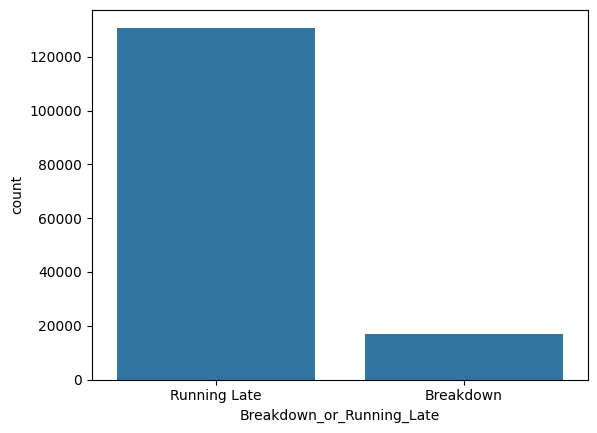

In [18]:
sns.countplot(x='Breakdown_or_Running_Late', data=df)

<Axes: >

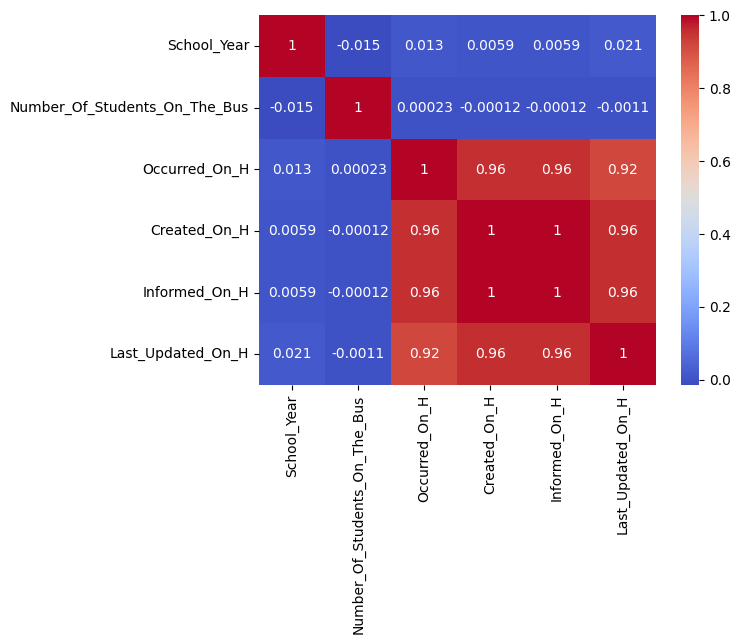

In [19]:
df_corr = df.select_dtypes(include=[np.number])
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [20]:
df = df.drop('How_Long_Delayed', axis=1)

In [21]:
df['Run_Type'].unique()

array(['Pre-K/EI', 'Special Ed AM Run', 'General Ed AM Run',
       'Special Ed PM Run', 'General Ed PM Run', 'Special Ed Field Trip',
       'General Ed Field Trip', nan, 'Project Read PM Run',
       'Project Read AM Run', 'Project Read Field Trip'], dtype=object)

In [22]:
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)

In [23]:
df['Reason'].unique()

array(['Other', 'Heavy Traffic', 'Flat Tire', 'Mechanical Problem',
       'Delayed by School', 'Problem Run', 'Late return from Field Trip',
       'Won`t Start', 'Weather Conditions', 'Accident', nan], dtype=object)

In [24]:
df['Reason'].fillna('Other', inplace=True)

In [25]:
df['Boro'].unique()

array(['Bronx', nan, 'Queens', 'Brooklyn', 'Nassau County', 'Manhattan',
       'Westchester', 'Staten Island', 'All Boroughs', 'Rockland County',
       'Connecticut', 'New Jersey'], dtype=object)

In [26]:
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)

In [27]:
df.isnull().sum()

,0
School_Year,0
Run_Type,0
Reason,0
Boro,0
Bus_Company_Name,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0


In [28]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  df[col] = label_enc.fit_transform(df[col])

<Axes: >

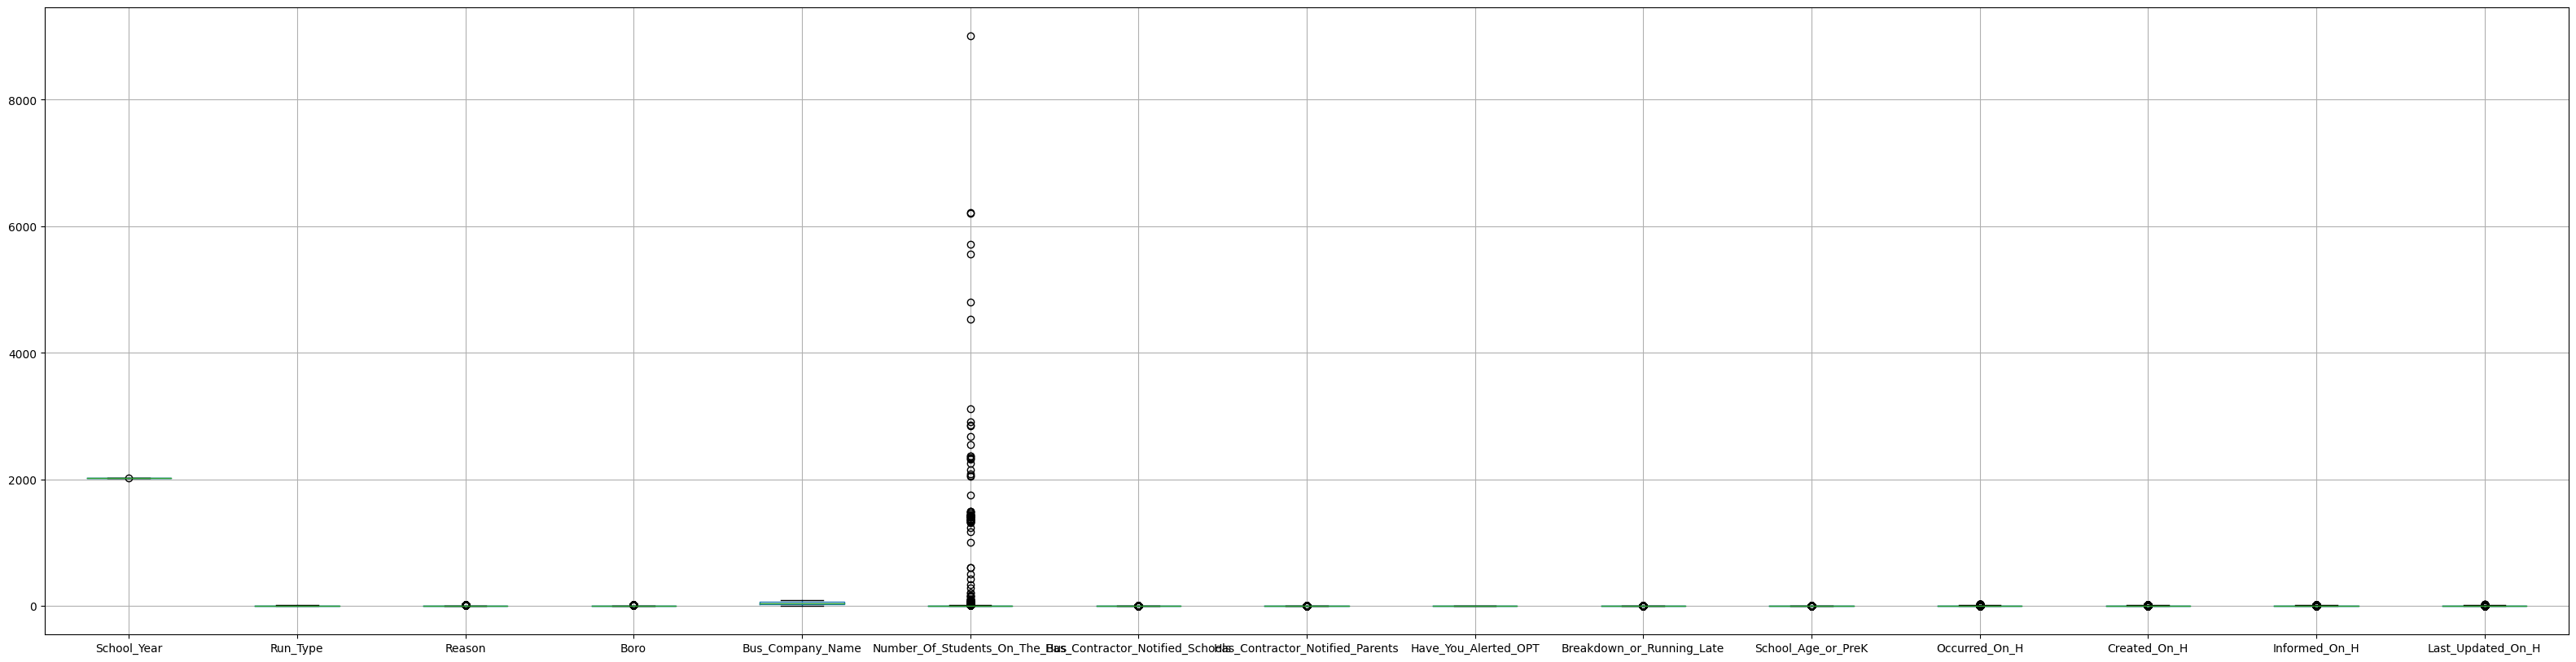

In [29]:
df.boxplot(figsize=(40,10))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147937 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      147937 non-null  int64
 1   Run_Type                         147937 non-null  int64
 2   Reason                           147937 non-null  int64
 3   Boro                             147937 non-null  int64
 4   Bus_Company_Name                 147937 non-null  int64
 5   Number_Of_Students_On_The_Bus    147937 non-null  int64
 6   Has_Contractor_Notified_Schools  147937 non-null  int64
 7   Has_Contractor_Notified_Parents  147937 non-null  int64
 8   Have_You_Alerted_OPT             147937 non-null  int64
 9   Breakdown_or_Running_Late        147937 non-null  int64
 10  School_Age_or_PreK               147937 non-null  int64
 11  Occurred_On_H                    147937 non-null  int32
 12  Created_On_H                     14

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [31]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [34]:
model = Sequential()

In [35]:
model.add(Dense(units=4, kernel_initializer='uniform',activation='relu', input_dim=X_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.add(Dense(units=6, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=4, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [37]:
model.add(Dense(units=1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6)                   │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179 (716.00 B)

 Trainable params: 155 (620.00 B)

 Non-trainable params: 24 (96.00 B)

## Training the Model
Train the ANN model using the training data.

In [40]:
history = model.fit(X_train, y_train, batch_size=150, epochs=150, validation_split=0.25)

Epoch 1/150
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6663 - loss: 0.5958 - val_accuracy: 0.9446 - val_loss: 0.6889
Epoch 2/150
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7366 - loss: 0.4770 - val_accuracy: 0.2640 - val_loss: 1.0013
Epoch 3/150
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7373 - loss: 0.4710 - val_accuracy: 0.2711 - val_loss: 0.8755
Epoch 4/150
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7305 - loss: 0.4735 - val_accuracy: 0.8972 - val_loss: 0.5611
Epoch 5/150
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7347 - loss: 0.4705 - val_accuracy: 0.9633 - val_loss: 0.6076
Epoch 6/150
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7382 - loss: 0.4690 - val_accuracy: 0.2701 - val_loss: 0.8739
Epoch 7/150
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7344 - loss: 0.4702 - val_accuracy: 0.2682 - val_loss: 0.7447
Epoch 8/150
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7365 - loss: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss: ',loss)
print('Accuracy: ',accuracy)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7647 - loss: 0.3280
Loss:  0.32732662558555603
Accuracy:  0.7647694945335388


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [42]:
prediction = model.predict(X_test)
prediction

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[0.9642226 ],
       [0.9548193 ],
       [0.96409094],
       ...,
       [0.96438605],
       [0.37048307],
       [0.96463454]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

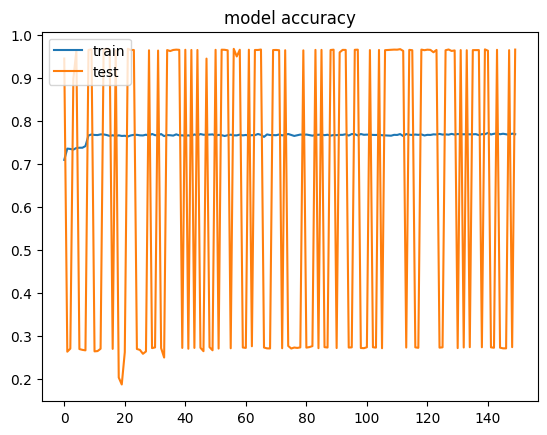

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

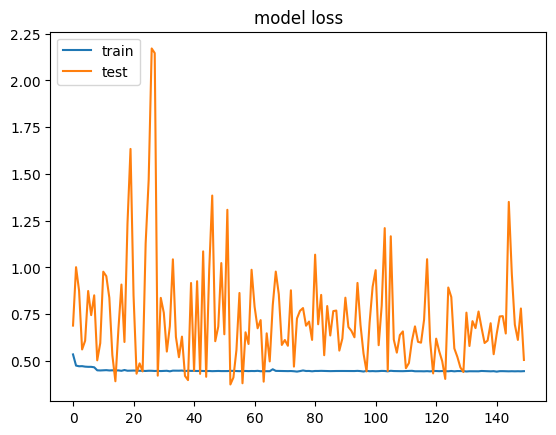

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model 2

In [57]:
model2 = Sequential()

In [58]:
model2.add(Dense(units=4, kernel_initializer='uniform',activation='relu', input_dim=X_train.shape[1]))

In [59]:
model2.add(Dense(units=6, activation='relu'))
model2.add(BatchNormalization())

model2.add(Dense(units=4, activation='relu'))
#model.add(BatchNormalization())

model2.add(Dense(units=4, activation='relu'))

model2.add(Dense(units=2, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))

In [60]:
model2.add(Dense(units=1, activation='sigmoid'))

In [61]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 4)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6)                   │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175 (700.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 12 (48.00 B)

In [63]:
history2 = model2.fit(X_train, y_train, batch_size=400, epochs=50, validation_split=0.15)

Epoch 1/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6912 - loss: 0.5753 - val_accuracy: 0.9726 - val_loss: 0.4884
Epoch 2/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8773 - loss: 0.3458 - val_accuracy: 0.9517 - val_loss: 0.3778
Epoch 3/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8893 - loss: 0.2944 - val_accuracy: 0.8015 - val_loss: 0.5576
Epoch 4/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8915 - loss: 0.2799 - val_accuracy: 0.9487 - val_loss: 0.2538
Epoch 5/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.2776 - val_accuracy: 0.9292 - val_loss: 0.2789
Epoch 6/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8941 - loss: 0.2744 - val_accuracy: 0.8486 - val_loss: 0.4154
Epoch 7/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8963 - loss: 0.2700 - val_accuracy: 0.9487 - val_loss: 0.2339
Epoch 8/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8947 - loss: 0.2718 - val_accuracy: 0.

In [68]:
loss, accuracy = model2.evaluate(X_test, y_test)
print('Loss: ',loss)
print('Accuracy: ',accuracy)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8972 - loss: 0.2423
Loss:  0.238353431224823
Accuracy:  0.9003649950027466


In [65]:
prediction = model2.predict(X_test)
prediction

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.9890745 ],
       [0.95868605],
       [0.99358386],
       ...,
       [0.99673444],
       [0.40036628],
       [0.9967062 ]], dtype=float32)

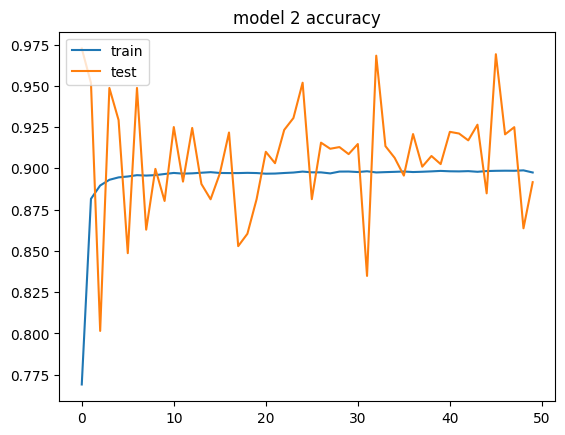

In [66]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

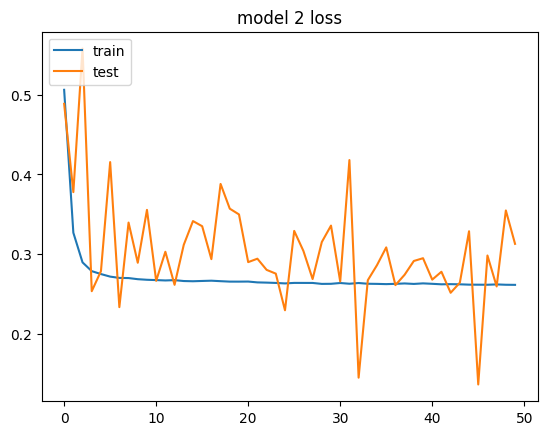

In [67]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save the Model
Save the trained model for submission.

In [69]:
model2.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:



1.   I first dropped the columns that contain ID data, then I dropped the duplicates. I then mapped but using replace function in the School_Year column, I then performed feature engineering and extracted the hours, I droped the coulmns datetype columns then. I filled the nulls with the most applicable way i found. I ploted the boxplot to detect outliers but i saw that there is no outliers actually.
2.   After multiple trials i settled on model 2 with only one BatchNormalization layer and 4 hidden dense layers. I tried diffrent neaurons on each layer but the one in model 2 gave the best accuracy. as for the activation function in the hidden layers i used relu but on the output layer i put sigmoid which works better in binary classification. I think it is appropriate since after many trials it game me the best consistant output.
3.   I chose the batch size that fittes the overall size of the data. as for the number of epochs i tried 100, 150, 200 and all of them stoped enhancing on 50th epoch so on the last model i sitteled with 50. for the optimizer i chose adam to get best of both worlds. this compination resulted with the best outcome for me.
4.   for loss function i chose binary_crossentropy and accuracy since this is what works with binary classification.
5.   I used dropout but it made the model inconsistant so i removed it however i used BatchNormalization once in the last model i chose.
6.   I visualized the loss and accuracy to see the performance of my model and to check if it was consistant through out the whole training or no.
7.   I used SMOTE since the data in imbalanced.
8.   my model at first was so overfitted and inconsistent in the training so i removed the BatchNormalization layers only left one and i removed the dropout i also played with the batch size to see if it gave better results.







